In [20]:
import pandas as pd
import numpy as np
import itertools

In [21]:


df = pd.read_spss('data.sav')


ImportError: Missing optional dependency 'pyreadstat'.  Use pip or conda to install pyreadstat.

In [5]:
economy_list = ['deficitReduce','overseasAid','changeEconomy','econGenRetro','econPersonalRetro','economyResponsible','selfPriorities_econ']
enviornment_list = ['climateChange','enviroGrowth','selfPriorities_environment']
immig_list = ['immigCultural','immigSelf','changeImmig','immigEcon','controlImmig']
health_list = ['selfPriorities_nhs','effectsEUNHS','changeNHS']
brexit_list = ['EUIntegrationSelf','cantLiveWithEU_1','cantLiveWithEU_2','cantLiveWithEU_3','cantLiveWithEU_4','selfPriorities_brexit','euRefVote','dealVremain','remainVnodeal','effectsEUUnemployment','effectsEUTrade','effectsEUImmigration','effectsEUTerror','effectsEUEcon','dealGoodBad','happyEULeave','euID','euRefDoOver','cancelBrexit']

In [6]:
total_list = [economy_list,enviornment_list,immig_list,health_list,brexit_list]
flat_list = [item for l in total_list for item in l]
flat_list.insert(0,'partyId')
print(flat_list)


['partyId', 'deficitReduce', 'overseasAid', 'changeEconomy', 'econGenRetro', 'econPersonalRetro', 'economyResponsible', 'selfPriorities_econ', 'climateChange', 'enviroGrowth', 'selfPriorities_environment', 'immigCultural', 'immigSelf', 'changeImmig', 'immigEcon', 'controlImmig', 'selfPriorities_nhs', 'effectsEUNHS', 'changeNHS', 'EUIntegrationSelf', 'cantLiveWithEU_1', 'cantLiveWithEU_2', 'cantLiveWithEU_3', 'cantLiveWithEU_4', 'selfPriorities_brexit', 'euRefVote', 'dealVremain', 'remainVnodeal', 'effectsEUUnemployment', 'effectsEUTrade', 'effectsEUImmigration', 'effectsEUTerror', 'effectsEUEcon', 'dealGoodBad', 'happyEULeave', 'euID', 'euRefDoOver', 'cancelBrexit']


In [116]:
#extracted_data = df.loc[:,flat_list]
extracted_data = df.copy()
extracted_data.columns= extracted_data.columns.str.strip().str.lower()

This section of code is preparing the data for use with k-modes, to see how the data clusters initially - K-modes uses a dissimalarity method

So we want to replace each of the NaN values with an unambiguous category, for example Don't know or impartial.... This has to be done manually for each value with a NaN 

In [124]:
import numpy as np

extracted_data = extracted_data.replace(np.nan, 0)
for col in extracted_data.columns:
    try:
        extracted_data[col] = extracted_data[col].fillna("Don't know")#we should centre our numerical stuff about 0
    except:
        print(col)
extracted_data['remainvnodeal'] = extracted_data['remainvnodeal'].replace(9999.0, "Don't know") 
extracted_data['remainvnodeal'] = extracted_data['remainvnodeal'].fillna("Don't know")
#print(extracted_data.columns)

originaldata = extracted_data.copy()  


ukcitizen
eucitizen
commonwealthcitizen
othercitizen
nochancecoalitionbrexit
nochancecoalitiondup
trustcourts
brexitunited
economyresponsible
happyniindepresultscale
happywalesindepresultscale
knowdevoresp_1
knowdevoresp_2
knowdevoresp_3
knowdevoresp_4
knowdevoresp_5
knowdevoresp_6
knowdevoresp_111
knowdevoresp_99
partycontactpc_1
partycontactpc_2
partycontactpc_3
partycontactpc_4
partycontactpc_5
partycontactpc_6
partycontactpc_7
partycontactind_1
partycontactind_2
partycontactind_3
partycontactind_4
partycontactind_5
partycontactind_6
partycontactind_7
partycontactother_1
partycontactother_2
partycontactother_3
partycontactother_4
partycontactother_5
partycontactother_6
partycontactother_7
loopholeexp
selfnumemployees
oslaua
lr_scale
al_scale
gender
age
agegroup
gor
pcon
p_country_birth
p_disability
p_parent
p_education_age
p_ethnicity
p_gross_personal
p_housing
p_marital
p_paper_read
p_religion
p_socgrade
p_work_stat
p_sexuality
p_scot_const_vote_2011
p_scot_list_vote_2011
p_scot_co

Now we have no NaN values as evidenced bellow

In [123]:
#extracted_data.isna().sum()
originaldata.isna().sum()

id                        0
starttime                 0
endtime                   0
wt                        0
turnoutukgeneral          0
                      ...  
p_turnout_2005        10371
p_turnout_scot_ref        0
p_edlevel              5273
p_edleveluni           3267
p_eurefturnout            0
Length: 522, dtype: int64

Now some data exploration of the representation of each party, as well as seeing how the questions may split each of them up

In [11]:
answers = []
for col in extracted_data.columns:
    
    answersforcol =[]
    count = 0
    for i in extracted_data[col]:
        i=str(i)
        if i not in answersforcol and not i.isdigit() and "." not in i:#is digit removes ints . removes floats if someones put a . in there written answer fuckem
            answersforcol.append(i)
    
        if i not in answers and not i.isdigit() and "." not in i:
            answers.append(i)
        count+=1
        if count > 300:
            break
    print("potential answers for "+str(col))
    print(answersforcol)

print("total list of answers:")
print(answers)


potential answers for partyid
['Labour', 'No - none', 'Liberal Democrat', 'Conservative', 'Plaid Cymru', 'Brexit Party', "Don't know", 'Green Party', 'Scottish National Party (SNP)', 'Other']
potential answers for deficitreduce
["Don't know", 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable', 'It is completely necessary', 'It is completely unnecessary']
potential answers for overseasaid
['Disagree', 'Neither agree nor disagree', 'Strongly agree', 'Agree', 'Strongly disagree', "Don't know"]
potential answers for changeeconomy
['Getting a lot worse', 'Staying about the same', 'Getting a little worse', 'Getting a lot better', "Don't know", 'Getting a little better']
potential answers for econgenretro
['Got a little worse', 'Stayed the same', 'Got a lot worse', "Don't know", 'Got a little better']
potential answers for econpersonalretro
['Got a little worse', 'Stayed the same', "Don't know", 'Got a little better', 'Got a lot worse', 'Got a lot

In [38]:
#manually sort prefixes
prefixes = [['nan','It is completely necessary', 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable', "Don't know",  'It is completely unnecessary'],
['Strongly disagree','Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree',  "Don't know"]]

def listoverlap(list1,list2):
    for i in list1:
        if i in list2:
            
            return True
    return False


In [33]:
linguisticprefixes = ['Strongly',"much","lot","little","bad","good","very","extremely","neither","higher","lower",
"moderate","absolutely", 'worse', 'better', 'about the same','A little',"Enriches","Undermines","many","fewer","more","agree","disagree","strongly"]
problemwords = ["not"]
for i in range(len(linguisticprefixes)):
    linguisticprefixes[i]=linguisticprefixes[i].lower()

answersnopre = []
for i in answers:
    i = str(i)
    i=i.lower()
    contains = False
    for k in linguisticprefixes:
        if k in i:
            contains = True
    if not contains:
        
        answersnopre.append(i)

        

In [79]:
#sorts the collums
extracted_data = originaldata.copy()
extracted_data=extracted_data.drop("partyid",axis=1)

colnames = []
for i in extracted_data.columns:
    colnames.append(str(i))
print(colnames)

orderedcolumns = []
columnsneedmanualsorting = []
onehotable = colnames#assumes all can be 1 hotted in beggining
    

alreadynumeric = []
#checks if answers already in numerical form
for col in list(onehotable):
   
    count = 0
    for i in extracted_data[col]:
        i=str(i)
        if i.isdigit() or "."  in i:#is digit removes ints . removes floats if someones put a . in there written answer fuckem
            #print(i)
            onehotable.remove(col)
            alreadynumeric.append(col)
            print(alreadynumeric)
            
            break
        count+=1
        if count > 300:
            break




numericandtext = []
for col in list(alreadynumeric):#col colnames of collums with numbers
    col =col.lower().strip()
    count = 0

    print(col)
    for i in extracted_data[col]:
        i=str(i)
        #print(i)
        if not i.isdigit() and not "."  in i:#if not digit must contain both
            #print(col)
            
            alreadynumeric.remove(col)
            numericandtext.append(col)
            #print(col)
            
            break
        count+=1
        if count > 400:
            break



print("------------------------------------------------\n\n")





for col in numericandtext:
    numericcol = []
    textcol = []
    for i in extracted_data[col]:
        i=str(i)
        if i.isdigit() or "."  in i:
            #print(i)
            
            numericcol.append(i)
            textcol.append("Don't know")
        else:
            numericcol.append("5")
            textcol.append(i)
    #print(extracted_data.columns)
    extracted_data.drop(columns = col)
    onehotable.append(col+"_text")
    extracted_data[col+"_text"]=textcol
    alreadynumeric.append(col+"_numeric")
    extracted_data[col+"_numeric"] = numericcol
    
    


for col in colnames:
    
    count=0
    for i in extracted_data[col]:
        i=str(i).lower()
        
        if(listoverlap(i.split(),linguisticprefixes)):#checks for overlap between lists
            
            orderedcolumns.append(col)
            onehotable.remove(col)#if needs sorting cannot be 1 hotted
            break#break if found atleast one instance of words that need ordering
        count+=1
        if count> 1000:
            break


for col in list(orderedcolumns):
    for k in extracted_data[col]:
        k=str(k).lower()
        if listoverlap(k.split(),problemwords):
            orderedcolumns.remove(str(col))
            columnsneedmanualsorting.append(col)
            break
        
            #if data contains problem words algorithm wont work so we need to sort it manually
            #simplest example is not
            #very very good > very good
            #but very very very not good > very very good
            #could maybe solve with a -1 term somwhere seems to complicated though
                
            

print("can probably be sorted:")
print(orderedcolumns)
print("gonna require manual sorting:")
print(columnsneedmanualsorting)
print("can be 1 hot encoded:")
print(onehotable)
print("already numeric")
print(alreadynumeric)


        

['deficitreduce', 'overseasaid', 'changeeconomy', 'econgenretro', 'econpersonalretro', 'economyresponsible', 'selfpriorities_econ', 'climatechange', 'envirogrowth', 'selfpriorities_environment', 'immigcultural', 'immigself', 'changeimmig', 'immigecon', 'controlimmig', 'selfpriorities_nhs', 'effectseunhs', 'changenhs', 'euintegrationself', 'cantlivewitheu_1', 'cantlivewitheu_2', 'cantlivewitheu_3', 'cantlivewitheu_4', 'selfpriorities_brexit', 'eurefvote', 'dealvremain', 'remainvnodeal', 'effectseuunemployment', 'effectseutrade', 'effectseuimmigration', 'effectseuterror', 'effectseuecon', 'dealgoodbad', 'happyeuleave', 'euid', 'eurefdoover', 'cancelbrexit']
['envirogrowth']
['envirogrowth', 'immigcultural']
['envirogrowth', 'immigcultural', 'immigself']
['envirogrowth', 'immigcultural', 'immigself', 'immigecon']
['envirogrowth', 'immigcultural', 'immigself', 'immigecon', 'euintegrationself']
['envirogrowth', 'immigcultural', 'immigself', 'immigecon', 'euintegrationself', 'happyeuleave']


In [69]:
answers = []
for col in alreadynumeric:
    
    answersforcol =[]
    count = 0
    for i in extracted_data[col]:
        i=str(i)
        if i not in answersforcol:#is digit removes ints . removes floats if someones put a . in there written answer fuckem
            answersforcol.append(i)
    
        if i not in answers:
            answers.append(i)
        count+=1
        if count > 300:
            break
    print("potential answers for "+str(col))
    print(answersforcol)

print("total list of answers:")
print(answers)




potential answers for envirogrowth_numeric
['8', '5', '1', '6', '9', '7', '2', '3', '4']
potential answers for immigcultural_numeric
['5', '3', '6', '4', '2']
potential answers for immigself_numeric
['7', '4', '5', '2', '6', '1', '8', '3', '9']
potential answers for immigecon_numeric
['5', '4', '6', '2', '3']
potential answers for euintegrationself_numeric
['5', '7', '3', '1', '2', '8', '9', '4', '6']
potential answers for happyeuleave_numeric
['2.0', '9.0', '5', '1.0', '3.0', '5.0', '7.0', '8.0', '4.0', '6.0']
total list of answers:
['8', '5', '1', '6', '9', '7', '2', '3', '4', '2.0', '9.0', '1.0', '3.0', '5.0', '7.0', '8.0', '4.0', '6.0']


In [80]:
onehotanswers = ["no - none"]

#print(linguisticprefixes)

arr = []
for col in onehotable:
    
    count = 0
    for k in extracted_data[col]:
        k=str(k)
        k=k.lower()
        count +=1
        #if(set(onehotanswers).isdisjoint(k.split())):
            #onehotanswers.append(k)
        if not listoverlap(k.split(),linguisticprefixes):

            #print(k)
            #print(col)   
            #arr.append((k,col))
            onehotanswers.append(k)
        if count> 1000:
            break
onehotanswers = list(dict.fromkeys(onehotanswers))
#print(arr)
print("answers:")
print(onehotanswers)
#these can be done using scikit label thing

#check this for stuff needed to be added to linguistic prefixes

answers:
['no - none', "don't know", 'stayed the same', 'a great deal', 'don\x92t know', 'not at all', 'yes', 'no', 'climate changing due to human activity', 'climate not changing', 'climate changing but not due to human activity', 'some control', 'no control at all', 'complete control', 'staying about the same', 'acceptable', 'unacceptable', 'stay/remain in the eu', 'leave the eu', 'i would/will not vote', 'remain in the eu', "the government's withdrawal deal", 'i would not vote', 'leave without a deal', 'about the same', 'protecting the environment should have priority', 'economic growth should have priority', 'enriches cultural life', 'undermines cultural life', 'unite fully with the european union', 'protect our independence']


In [81]:
linguisticprefixes =['Strongly',"much","lot","little","bad","good","very","extremely","neither","higher","lower",
"moderate","absolutely", 'worse', 'better', 'about the same','A little',"Enriches","Undermines","many","fewer","more","agree","disagree","strongly"]
lmultipliers = ['Strongly',"much","lot","extremely","very","extremely","absolutely","more","strongly"]#strong multipliers
#could split strong multipliers theres never more then 1 in a 
smultipliers = ["little","fewer"]#weak multipliers

posadd =["good","better","Enriches","agree","disagree"]#map to 0>
negadd = ["bad","lower","worse","Undermines"]#map to 0<
zadd =["about the same","dont know"]#map to 0

# linguisticprefixes = lmultipliers+smultiplier+posadd+zadd



In [82]:
onehotted = extracted_data[onehotable].copy()
print(onehotted.columns)
onehotted = pd.get_dummies(onehotted)
answers = []

print(onehotted.columns)

            


Index(['overseasaid', 'econgenretro', 'economyresponsible',
       'selfpriorities_econ', 'climatechange', 'selfpriorities_environment',
       'controlimmig', 'selfpriorities_nhs', 'changenhs', 'cantlivewitheu_1',
       'cantlivewitheu_2', 'cantlivewitheu_3', 'cantlivewitheu_4',
       'selfpriorities_brexit', 'eurefvote', 'dealvremain', 'remainvnodeal',
       'effectseutrade', 'effectseuterror', 'dealgoodbad', 'eurefdoover',
       'envirogrowth_text', 'immigcultural_text', 'immigecon_text',
       'euintegrationself_text'],
      dtype='object')
Index(['overseasaid_Agree', 'overseasaid_Disagree', 'overseasaid_Don't know',
       'overseasaid_Neither agree nor disagree', 'overseasaid_Strongly agree',
       'overseasaid_Strongly disagree', 'econgenretro_Don't know',
       'econgenretro_Got a little better', 'econgenretro_Got a little worse',
       'econgenretro_Got a lot better',
       ...
       'envirogrowth_text_Protecting the environment should have priority',
       'immigc

In [83]:

for i in columnsneedmanualsorting:
    print(i)
    print(extracted_data[i].unique)

#print(pd.Series(extracted_data[columnsneedmanualsorting]).unique)

deficitreduce
<bound method Series.unique of 0                                           Don't know
1        It is important but not absolutely  necessary
2                                           Don't know
3                                           Don't know
4                                           Don't know
                             ...                      
34361                                       Don't know
34362                                       Don't know
34363                                       Don't know
34364                                       Don't know
34365                                       Don't know
Name: deficitreduce, Length: 34366, dtype: category
Categories (5, object): ['Don't know', 'It is completely necessary', 'It is completely unnecessary', 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable']>


In [84]:



#['Don't know', 'It is completely necessary', 'It is completely unnecessary', 'It is important but not absolutely  necessary', 'It is not necessary but it would be desirable']
replacedict = {"Don't know":0,'It is completely unnecessary':-1,'It is not necessary but it would be desirable':1,'It is important but not absolutely  necessary':2,'It is completely necessary':3}
manual = extracted_data["deficitreduce"].copy().replace(replacedict)
print(onehotted.columns)
onehotted["deficitreduce"]=manual
print(onehotted["deficitreduce"])

Index(['overseasaid_Agree', 'overseasaid_Disagree', 'overseasaid_Don't know',
       'overseasaid_Neither agree nor disagree', 'overseasaid_Strongly agree',
       'overseasaid_Strongly disagree', 'econgenretro_Don't know',
       'econgenretro_Got a little better', 'econgenretro_Got a little worse',
       'econgenretro_Got a lot better',
       ...
       'envirogrowth_text_Protecting the environment should have priority',
       'immigcultural_text_Don't know',
       'immigcultural_text_Enriches cultural life',
       'immigcultural_text_Undermines cultural life',
       'immigecon_text_Bad for economy', 'immigecon_text_Don't know',
       'immigecon_text_Good for economy', 'euintegrationself_text_Don't know',
       'euintegrationself_text_Protect our independence',
       'euintegrationself_text_Unite fully with the European Union'],
      dtype='object', length=103)
0        0
1        2
2        0
3        0
4        0
        ..
34361    0
34362    0
34363    0
34364    0
3436

In [85]:
extracted_data.columns= extracted_data.columns.str.strip().str.lower()

#for i in extracted_data.columns:
    #print(i)

orderable = extracted_data[orderedcolumns].copy()
y = 0
newdf = pd.DataFrame()
for col in orderable.columns:
    print(len(orderable[col]))    
    x=0
    colvals = []
    for i in orderable[col]:
        x+=1
        val=1
        i = str(i).lower()
        if not i.isdigit():
            i=i.split()
            if listoverlap(i,zadd):
                val = 0
            if listoverlap(i,posadd):
                val +=2
            if listoverlap(i,negadd):
                val -=2          
            if listoverlap(i,lmultipliers):
                val = val*2
            if listoverlap(i,smultipliers):
                val = val*1/2
            #orderable[col].replace({str(i),val})
            colvals.append(val)
            #if x % 50 == 0:
                #print((x,y))
    #print(colvals)
    newdf[col]=colvals
    y+=1
print(newdf.columns)    
newdf["deficitreduce"]=manual
newdf = pd.concat([newdf,onehotted],axis=1)
print(newdf.columns)





34366
34366
34366
34366
34366
34366
34366
34366
34366
34366
34366
Index(['changeeconomy', 'econpersonalretro', 'changeimmig', 'effectseunhs',
       'effectseuunemployment', 'effectseuimmigration', 'effectseuecon',
       'euid', 'cancelbrexit', 'immigself_text', 'happyeuleave_text'],
      dtype='object')
Index(['changeeconomy', 'econpersonalretro', 'changeimmig', 'effectseunhs',
       'effectseuunemployment', 'effectseuimmigration', 'effectseuecon',
       'euid', 'cancelbrexit', 'immigself_text',
       ...
       'immigcultural_text_Don't know',
       'immigcultural_text_Enriches cultural life',
       'immigcultural_text_Undermines cultural life',
       'immigecon_text_Bad for economy', 'immigecon_text_Don't know',
       'immigecon_text_Good for economy', 'euintegrationself_text_Don't know',
       'euintegrationself_text_Protect our independence',
       'euintegrationself_text_Unite fully with the European Union',
       'deficitreduce'],
      dtype='object', length=116)


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(type(newdf))
print(len(newdf.columns))
print(len(newdf))
scaleddf = pd.DataFrame(scaler.fit_transform(newdf), columns=newdf.columns)
print(type(newdf))

scaleddf["partyid"]=originaldata["partyid"]

<class 'pandas.core.frame.DataFrame'>
116
34366
<class 'pandas.core.frame.DataFrame'>


In [87]:
print(scaleddf["partyid"])
from pathlib import Path  
filepath = Path('Enumerated_Scaled_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
scaleddf.to_csv(filepath)  
    

0              Labour
1           No - none
2           No - none
3              Labour
4              Labour
             ...     
34361       No - none
34362    Conservative
34363      Don't know
34364    Conservative
34365    Conservative
Name: partyid, Length: 34366, dtype: category
Categories (11, object): ['Brexit Party', 'Conservative', 'Don't know', 'Green Party', ..., 'Other', 'Plaid Cymru', 'Scottish National Party (SNP)', 'United Kingdom Independence Party (UKIP)']


(34366, 4)
[0.17304784 0.08385047 0.06454049 0.04796787]
0              Labour
1           No - none
2           No - none
3              Labour
4              Labour
             ...     
34361       No - none
34362    Conservative
34363      Don't know
34364    Conservative
34365    Conservative
Name: partyid, Length: 34366, dtype: category
Categories (11, object): ['Brexit Party', 'Conservative', 'Don't know', 'Green Party', ..., 'Other', 'Plaid Cymru', 'Scottish National Party (SNP)', 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' "Don't know" 'Green Party' 'Labour'
 'Liberal Democrat' 'No - none' 'Other' 'Plaid Cymru'
 'Scottish National Party (SNP)'
 'United Kingdom Independence Party (UKIP)']


"\nfor i in u_labels:\n    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)\nplt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')\nplt.legend()\nplt.show()\n"

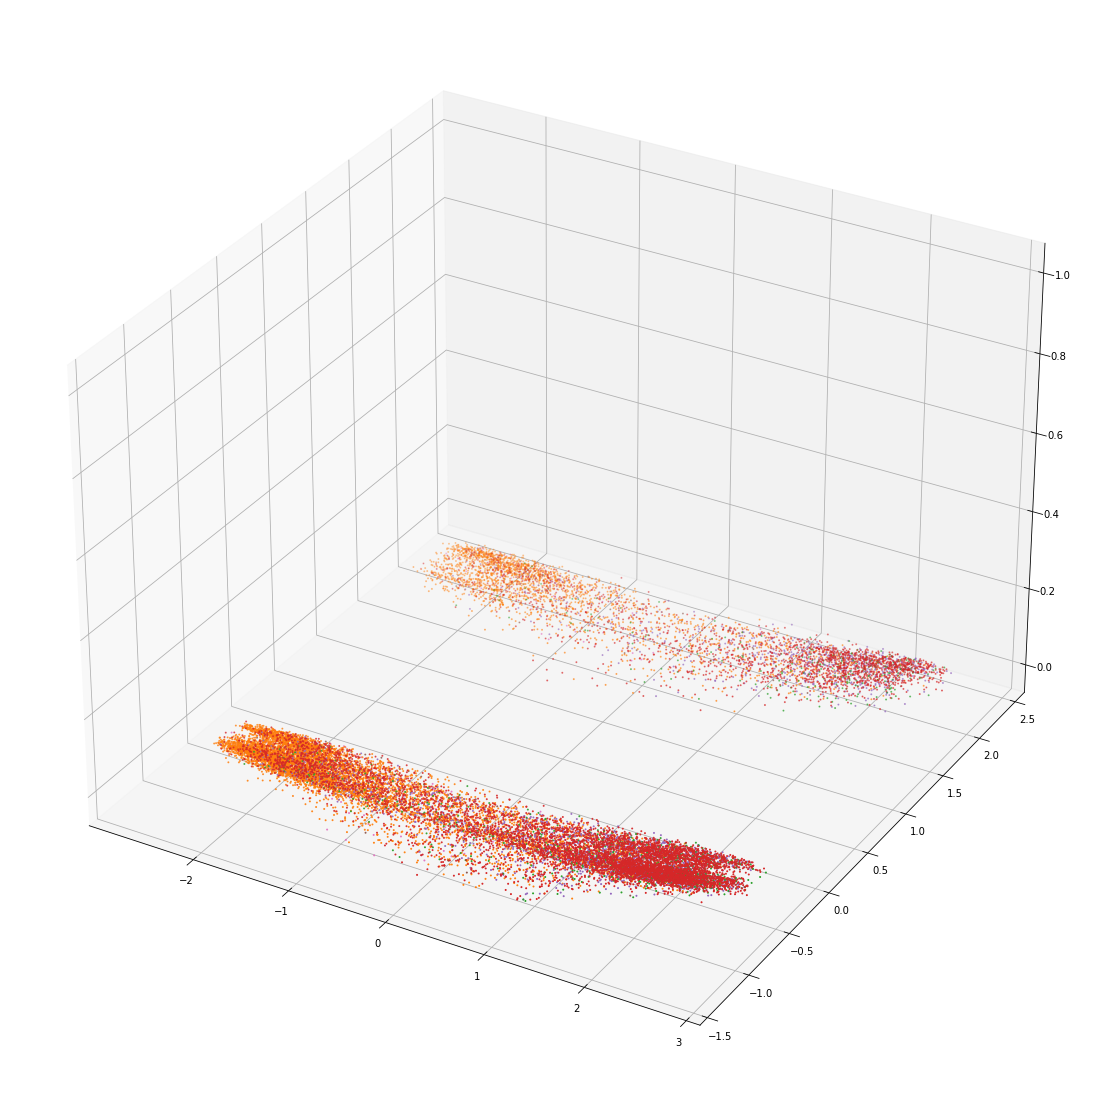

In [134]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaleddfnoid = scaleddf.drop("partyid",axis = 1)
vals = scaleddfnoid.values
pca = PCA(n_components=4)

x = pca.fit_transform(vals)
print(np.shape(x))
print(pca.explained_variance_ratio_)

km = KMeans(n_clusters=5)
label = scaleddf["partyid"] #km.fit_predict(x)
print(label)

#print(km.labels_)
#print(km.cluster_centers_)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
 
u_labels = np.unique(label)
print(u_labels)
u_labels[0]="ukip"
#plotting the results:
#fig(figsize=(20,20))
k = 0
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(x[label == i , 0] ,x[label == i , 1], label = i,s=1)
    
    k+=1
ax.legend
#centroids = km.cluster_centers_

 
#plotting the results:
"""
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
"""

0              Labour
1           No - none
2           No - none
3              Labour
4              Labour
             ...     
34361       No - none
34362    Conservative
34363      Don't know
34364    Conservative
34365    Conservative
Name: partyid, Length: 34366, dtype: category
Categories (11, object): ['Brexit Party', 'Conservative', 'Don't know', 'Green Party', ..., 'Other', 'Plaid Cymru', 'Scottish National Party (SNP)', 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' "Don't know" 'Green Party' 'Labour'
 'Liberal Democrat' 'No - none' 'Other' 'Plaid Cymru'
 'Scottish National Party (SNP)'
 'United Kingdom Independence Party (UKIP)']


<bound method Axes.legend of <Axes3DSubplot:>>

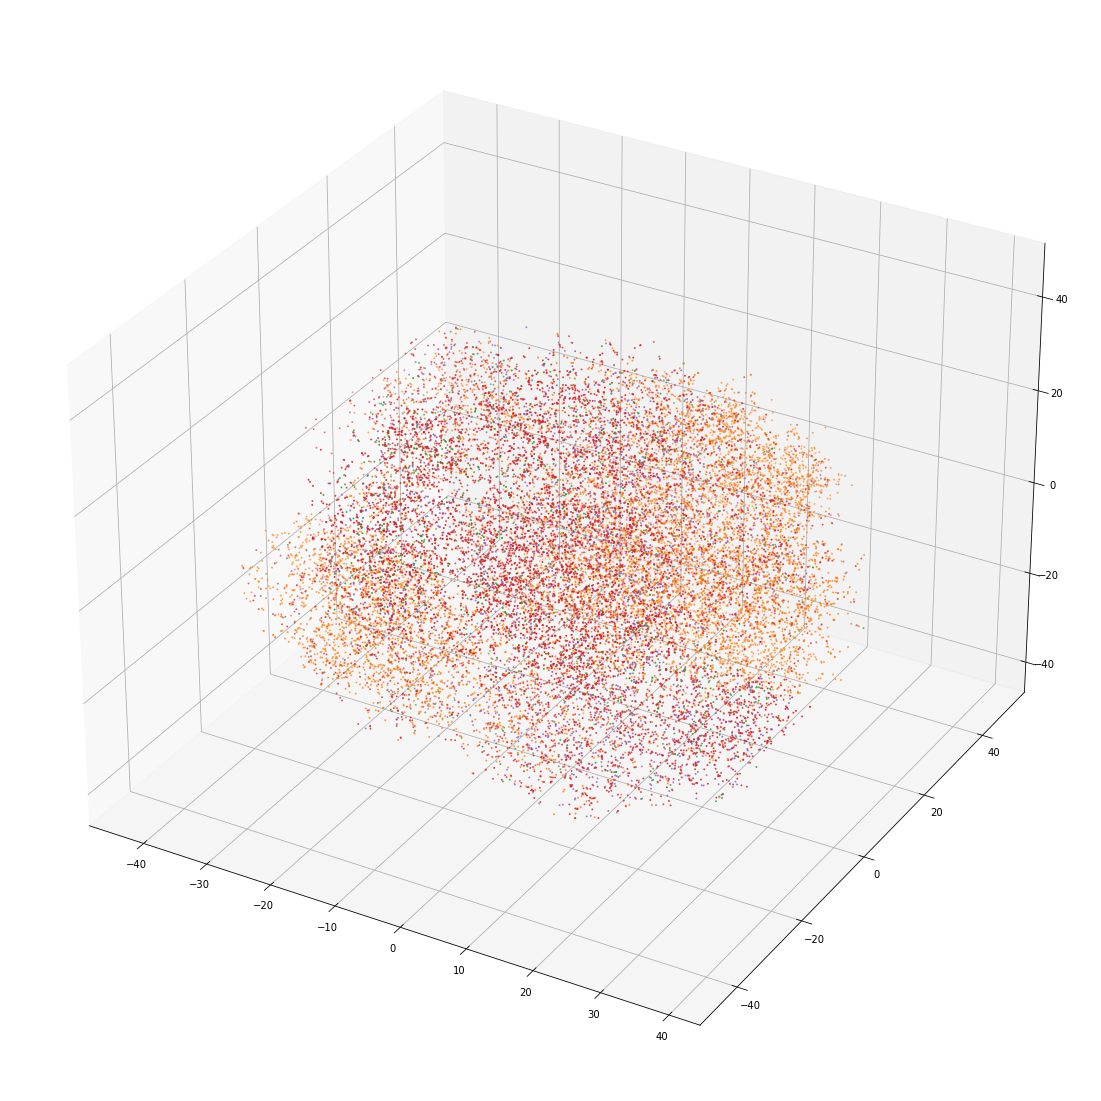

In [135]:
from sklearn.manifold import TSNE




x = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(vals)


label = scaleddf["partyid"] #km.fit_predict(x)
print(label)

#print(km.labels_)
#print(km.cluster_centers_)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')
 
u_labels = np.unique(label)
print(u_labels)
u_labels[0]="ukip"
#plotting the results:
#fig(figsize=(20,20))
k = 0
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    #ax.scatter(x[label == i , 0] ,x[label == i , 1], label = i,s=1)
    
    k+=1
ax.legend

34366
0             Labour
1          No - none
2          No - none
3             Labour
4             Labour
            ...     
17178         Labour
17179    Green Party
17180      No - none
17181      No - none
17182      No - none
Name: partyid, Length: 17183, dtype: category
Categories (11, object): ['Brexit Party', 'Conservative', 'Don't know', 'Green Party', ..., 'Other', 'Plaid Cymru', 'Scottish National Party (SNP)', 'United Kingdom Independence Party (UKIP)']
['Brexit Party' 'Conservative' "Don't know" 'Green Party' 'Labour'
 'Liberal Democrat' 'No - none' 'Other' 'Plaid Cymru'
 'Scottish National Party (SNP)'
 'United Kingdom Independence Party (UKIP)']


<bound method Axes.legend of <AxesSubplot:>>

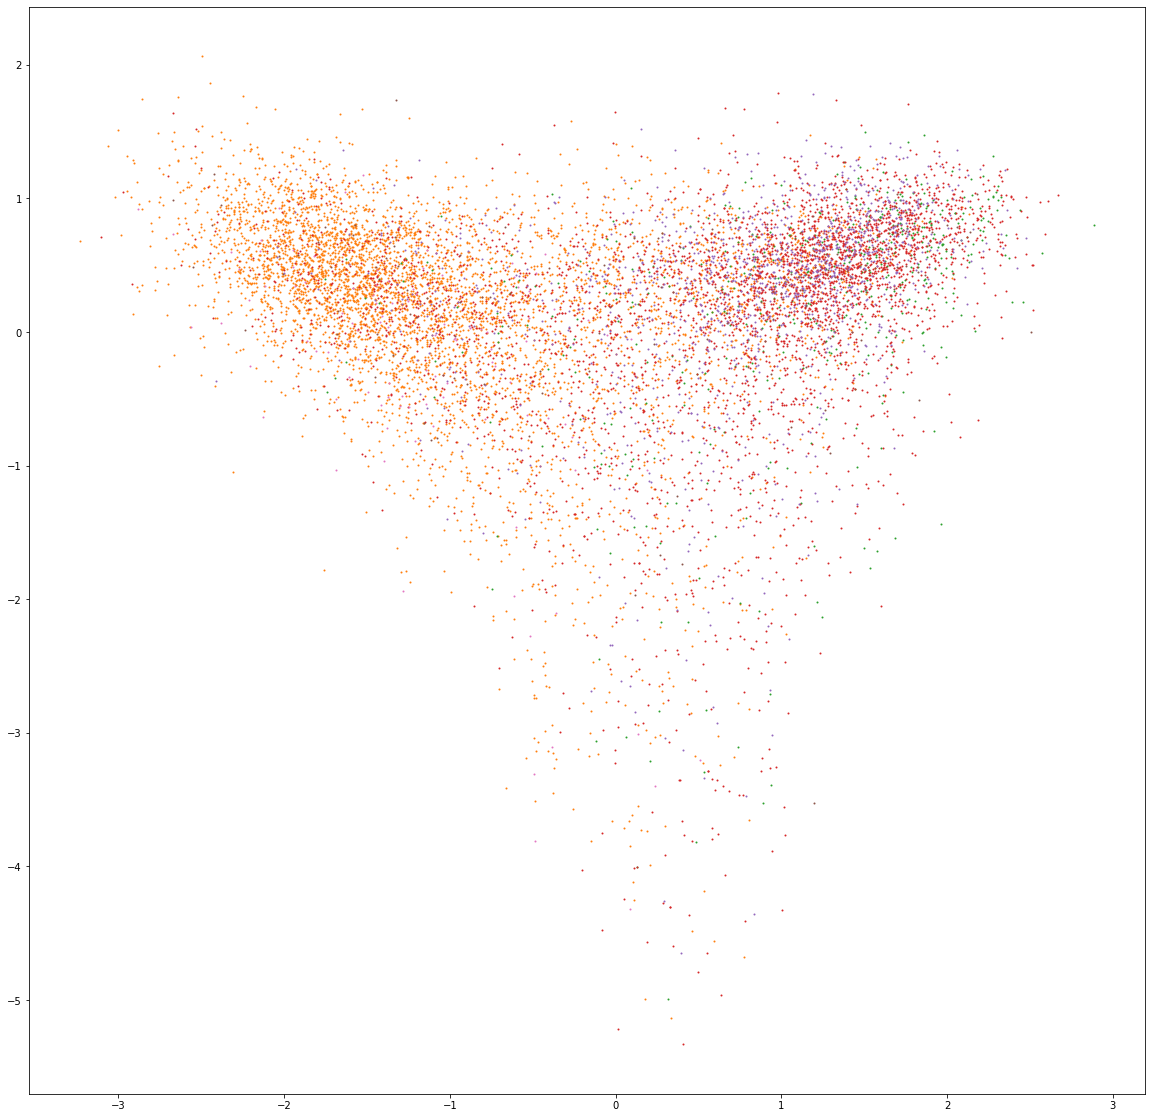

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
print(len(vals))
testvals = vals[0:int(len(vals)/2)]
testlabels = scaleddf["partyid"][0:int(len(vals)/2)]
trainlabels = scaleddf["partyid"][int(len(vals)/2):len(vals)]
trainvals = vals[int(len(vals)/2):len(vals)]
model=clf.fit(trainvals, trainlabels)#.fit(testvals,testlabels)
label = testlabels 
print(label)
x=model.transform(trainvals)
#print(km.labels_)
#print(km.cluster_centers_)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
 
u_labels = np.unique(label)
print(u_labels)
u_labels[0]="ukip"
#plotting the results:
#fig(figsize=(20,20))
k = 0
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(x[label == i , 0] ,x[label == i , 1], label = i,s=1)
    
    k+=1
ax.legend


In [142]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier


nca = NeighborhoodComponentsAnalysis(init="lda")


testvals = vals[0:int(len(vals)/2)]
testlabels = scaleddf["partyid"][0:int(len(vals)/2)]
trainlabels = scaleddf["partyid"][int(len(vals)/2):len(vals)]
trainvals = vals[int(len(vals)/2):len(vals)]
model=nca.fit(trainvals, trainlabels)#.fit(testvals,testlabels)
label = testlabels 
print(label)
x=model.transform(testvals)
#print(km.labels_)
#print(km.cluster_centers_)


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
 
u_labels = np.unique(label)
print(u_labels)
u_labels[0]="ukip"
#plotting the results:
#fig(figsize=(20,20))
k = 0
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(x[label == i , 0] ,x[label == i , 1], label = i,s=1)
    
    k+=1
ax.legend

In [ ]:
list_unique_parites = extracted_data['partyId'].unique()
list_unique_parties = list(list_unique_parites)
party_sums = []
for i in range(len(list_unique_parites)):
    count = 0 
    for x in (extracted_data['partyId'] == list_unique_parites[i]):
        if x == True:
            count += 1
    party_sums.append(count)
        

In [ ]:
party_data = {'Parties':list_unique_parites,'Count':party_sums}
data_parties = pd.DataFrame(party_data)


In [ ]:
percentages =[]
for i in data_parties['Count']:
    percentages.append(int(i)/data_parties.sum()*100)

data_parties['Percentages']= percentages
data_parties

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data_parties['Count'],labels = data_parties['Parties'],shadow = False)
plt.figure(facecolor="white")
plt.show()

K-prototype clustering

In [ ]:
k_modes_data = extracted_data.drop(['partyId','enviroGrowth','immigCultural','immigSelf','immigEcon','EUIntegrationSelf','happyEULeave'],axis=1)

In [ ]:
k_modes_data_matrix = k_modes_data.to_numpy()



In [ ]:
from kmodes.kmodes import KModes

In [ ]:
cost = []
for cluster in range(1, 11):
    kmodes = KModes(n_clusters = cluster, init = 'Huang', random_state = 0)
    kmodes.fit_predict(k_modes_data_matrix)
    cost.append(kmodes.cost_)
    print('Cluster initiation: {}'.format(cluster))
  
print(len(cost))

In [ ]:
df_cost = pd.DataFrame({'Cluster': range(1, 11), 'Cost': cost})

In [ ]:
from plotnine import *
import plotnine

In [ ]:

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
kmodes = KModes(n_jobs = -1, n_clusters = 6, init = 'Huang', random_state = 0)
kmodes.fit_predict(k_modes_data_matrix)

In [ ]:
extracted_data['Cluster Labels'] = kmodes.labels_


In [ ]:
assignments_cluster_0 =[]
assignments_cluster_1 =[]
assignments_cluster_2 =[]
assignments_cluster_3 =[]
assignments_cluster_4 =[]
assignments_cluster_5 =[]
for x in range(len(extracted_data['partyId'])):
    if extracted_data.loc[x,'Cluster Labels'] == 0:
        assignments_cluster_0.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 1:
        assignments_cluster_1.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 2:
        assignments_cluster_2.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 3:
        assignments_cluster_3.append(extracted_data.loc[x,'partyId'])
    elif extracted_data.loc[x,'Cluster Labels'] == 4:
        assignments_cluster_4.append(extracted_data.loc[x,'partyId'])
    else:
        assignments_cluster_5.append(extracted_data.loc[x,'partyId'])
    
    
        
    

In [ ]:
Cluster1 = pd.DataFrame({'Assignments': assignments_cluster_5})
Cluster1['Assignments'].value_counts()
